<a href="https://colab.research.google.com/github/iamnovocaine/inf_search/blob/main/8_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Тексты9.zip to Тексты9.zip


In [4]:
import zipfile
with zipfile.ZipFile("Тексты9.zip","r") as zip_ref:
    zip_ref.extractall("Тексты9")

!wget http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
!tar -xvf mystem-3.0-linux3.1-64bit.tar.gz
!cp mystem /root/.local/bin/mystem

from pymystem3 import Mystem
mystem = Mystem(disambiguation=True)

import numpy as np
import matplotlib.pyplot as plt
import math

--2021-01-19 13:31:08--  http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
Resolving download.cdn.yandex.net (download.cdn.yandex.net)... 5.45.205.241, 5.45.205.242, 5.45.205.245, ...
Connecting to download.cdn.yandex.net (download.cdn.yandex.net)|5.45.205.241|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://cache-mskm901.cdn.yandex.net/download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz [following]
--2021-01-19 13:31:08--  http://cache-mskm901.cdn.yandex.net/download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
Resolving cache-mskm901.cdn.yandex.net (cache-mskm901.cdn.yandex.net)... 5.45.220.11, 2a02:6b8:0:2002::12
Connecting to cache-mskm901.cdn.yandex.net (cache-mskm901.cdn.yandex.net)|5.45.220.11|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16457938 (16M) [application/octet-stream]
Saving to: ‘mystem-3.0-linux3.1-64bit.tar.gz.1’

mystem-3.0-linux3.1 100%[===================>] 

In [10]:
import re
from prettytable import PrettyTable 
import os
import copy
import pandas as pd

terms = {} #словарь слово - количество раз в текстах
rangs = {} #словарь количество раз - ранг
stops = []
documents = []
filenames = []
vector = list()
termsSorted = {}

requests = [
  ["полив", "яблоня"],
  ["содержание", "вода", "почва"],
  ["потребность", "культура", "влага"],
  ["земля", "вода"],
  ["способ","посадка", "плодовый", "дерево"]
]

metrics = [
    ["17.txt", "18.txt"],
    ["12.txt", "14.txt", "17.txt", "N02.txt", "N03.txt", "N04.txt", "N05.txt", "N06.txt", "N14.txt"],
    ["15.txt", "16.txt", "N06.txt"],
    ["12.txt", "N01.txt", "N02.txt", "N03.txt", "N04.txt", "N05.txt", "N07.txt", "N10.txt", "N12.txt"],
    ["18.txt"]
]

# составляем индекс поисковой системы
for root, dirs, files in os.walk("Тексты9"):  
  for filename in files:
      terms_in_one = {} #словарь слово - количество раз в одном тексте
      raw = []
      # print("открываем  файл " + filename)
      raw = open("Тексты9/" + filename , 'r', encoding='utf8').read()
      
      # записываем в словарь 'terms' термы из документов
      for txt in mystem.lemmatize(raw):
          if str(txt).isalpha():
            res = mystem.analyze(str(txt))
            if res[0]['analysis'] and len(str(txt)) > 1:
              if res[0]['analysis'][0]['gr'].startswith("S,") or res[0]['analysis'][0]['gr'].startswith("A=") or res[0]['analysis'][0]['gr'].startswith("V") or res[0]['analysis'][0]['gr'].startswith("A,"):
                if str(txt) in terms:
                  terms[str(txt)] = terms[str(txt)] + 1
                else:
                  terms[str(txt)] = 1

                if str(txt) in terms_in_one:
                  terms_in_one[str(txt)] = terms_in_one[str(txt)] + 1
                else:
                  terms_in_one[str(txt)] = 1
              else:
                stops.append(str(txt))
      documents.append(terms_in_one)
      filenames.append(filename)

for word in sorted(terms, key=terms.get, reverse=True)[:700]:
  termsSorted[str(word)] = terms[word]

# print(documents)

[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 5, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 7, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,

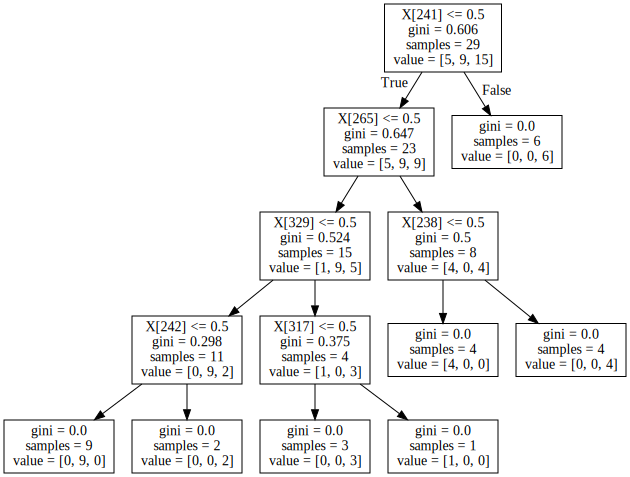

In [18]:
import numpy as np

lemmasCount = 0
all_lemmas = set()
for index in range(len(documents)):
  for x in documents[index].keys():
    all_lemmas.add(x)
lemmas = list(all_lemmas)[:500]

input_matrix = []
for index in range(len(files)):
  curRow = []
  for x in lemmas:
    if x in documents[index]:
      curRow.append(documents[index][x])
    else:
      curRow.append(0)
  # print(curRow)
  input_matrix.append(curRow)

print(input_matrix)

# классы: 0 - влияние воды на живые организмы, 1 - советы садоводам/по уходу за растениями, 2 - описание почвы
classification = [0, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 1, 1, 0]

# print(len(classification))

# На основе Дерева принятия решений;
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42332)
decision_tree_classifier.fit(input_matrix, classification)

# На основе наивного Байесовского подхода;
from sklearn.naive_bayes import GaussianNB
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(input_matrix, classification)

# На основе метода Роккио;
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestCentroid

filepaths = ['Тексты9/' + filename for filename in files]

filepaths.append(os.getcwd() + '/' + 'Class.txt')
vectorizer =  TfidfVectorizer(input='filename')
input_rocchio = vectorizer.fit_transform(filepaths)

X_to_clf = input_rocchio[29]
X_rocchio = input_rocchio[:-1]

rocchio_classifier = NearestCentroid()
rocchio_classifier.fit(X_rocchio, classification)

# На основе регрессии.
from sklearn.linear_model import LogisticRegression

logistic_regression_classifier = LogisticRegression()
logistic_regression_classifier.fit(input_matrix, classification)

raw = open('Class.txt', 'r', encoding='utf8').read()
# берем все леммы из файла и фильтруем чтобы не учитывать знаки препинания и т.д.
lemmas_test = list(filter(lambda x: x != ' ' and x!= ' (' and x != ', ' and x != '-' and x!= '.). ' and x != '\n' and x != '. ' and x != '; ' and x != '.' and x != ' – ' and x != ' — ' and x != ',' and x != '\ufeff', mystem.lemmatize(raw)))
# словарь где ключ это лемма, а значение - частота этой леммы
frequencyForClass = {}
# идем циклом по леммам и считаем сколько раз каждая лемма встречается
for lemma in lemmas_test:
  lemmasCount += 1
  # если лемма раньше уже встречалась то увеличиваем ее частоты на единицу
  if lemma in frequencyForClass:
    frequencyForClass[lemma] += 1
  # иначе эта лемма встречалется первый раз, то есть ее частота - один
  else:
    frequencyForClass[lemma] = 1

print(frequencyForClass)
classRow = []
for x in lemmas:
  if x in frequencyForClass:
    classRow.append(frequencyForClass[x])
  else:
    classRow.append(0)

decision_tree_prediction = decision_tree_classifier.predict(np.array(classRow).reshape(1, -1))
print("Decision tree:", decision_tree_prediction[0])

naive_bayes_prediction = naive_bayes_classifier.predict(np.array(classRow).reshape(1, -1))
print("Naive bayes:", naive_bayes_prediction[0])

rocchio_prediction = rocchio_classifier.predict(X_to_clf)
print("Rocchio:", rocchio_prediction[0])

logistic_regression_prediction = logistic_regression_classifier.predict(np.array(classRow).reshape(1, -1))
print("Logistic regression:", logistic_regression_prediction[0])

from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(decision_tree_classifier, out_file=None) 
graph = graphviz.Source(dot_data) 
graph